# Titanic - Machine Learning from Disaster
This notebook aims to solve the problem from Kaggle Titanic - Machine Learning from Disaster competition. The goal of the competition is to create ML model that predicts which passengers survived the Titanic shipwreck

## Data Understanding

### Import data from .csv file

In [67]:
import pandas as pd
import numpy as np

In [68]:
#import training dataset
df_train = pd.read_csv("data/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
#import test dataset
df_test = pd.read_csv("data/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


It can be noticed that only training data set contain information about passenger survival. The test set will be used only to evaluate the final Kaggle score and be seen after uploading the final results

### Data description

The dataset provides the following information about the passenger:

In [70]:
#get list of available passenger information
columns = df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The columns hold the following information:
* <b>PassengerId</b> - unique id of a passenger
* <b>Survived</b> - 0 if passenger did not survive, 1 if passenger survived
* <b>Pclass</b> - number of passenger class (1st class - Upper, 2nd class middle, 3rd class - lower)
* <b>Name</b> - name of a passenger
* <b>Sex</b> - sex of a passenger
* <b>Age</b> - age of a passenger
* <b>SibSp</b> - # of siblings / spouses aboard the Titanic
* <b>Parch</b> - # of parents / children aboard the Titanic
* <b>Ticket</b> - ticket number
* <b>Fare</b> - passenger fare
* <b>Cabin</b> - cabin number
* <b>Embarked</b> - port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [71]:
#get number of samples
print("Number of sample in train set: ", len(df_train.index))
print("Number of sample in test set: ", len(df_test.index))

Number of sample in train set:  891
Number of sample in test set:  418


Check the statistical properties of the data:

In [72]:
#get statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
#print unique values of each column
for col in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']:
  print(str(col), ": ", df_train[col].unique())

Survived :  [0 1]
Pclass :  [3 1 2]
Sex :  ['male' 'female']
Age :  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp :  [1 0 3 4 2 5 8]
Parch :  [0 1 2 5 3 4 6]
Ticket :  ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' 

In [74]:
#print number of unique values in each column
for col in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']:
    print(str(col),":")
    print(df_train[col].value_counts())

Survived :
0    549
1    342
Name: Survived, dtype: int64
Pclass :
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex :
male      577
female    314
Name: Sex, dtype: int64
Age :
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
SibSp :
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch :
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Ticket :
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
Fare :
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
Cabin :
B96 B98        4
G6             4
C23 C25 C

Show data distribution

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

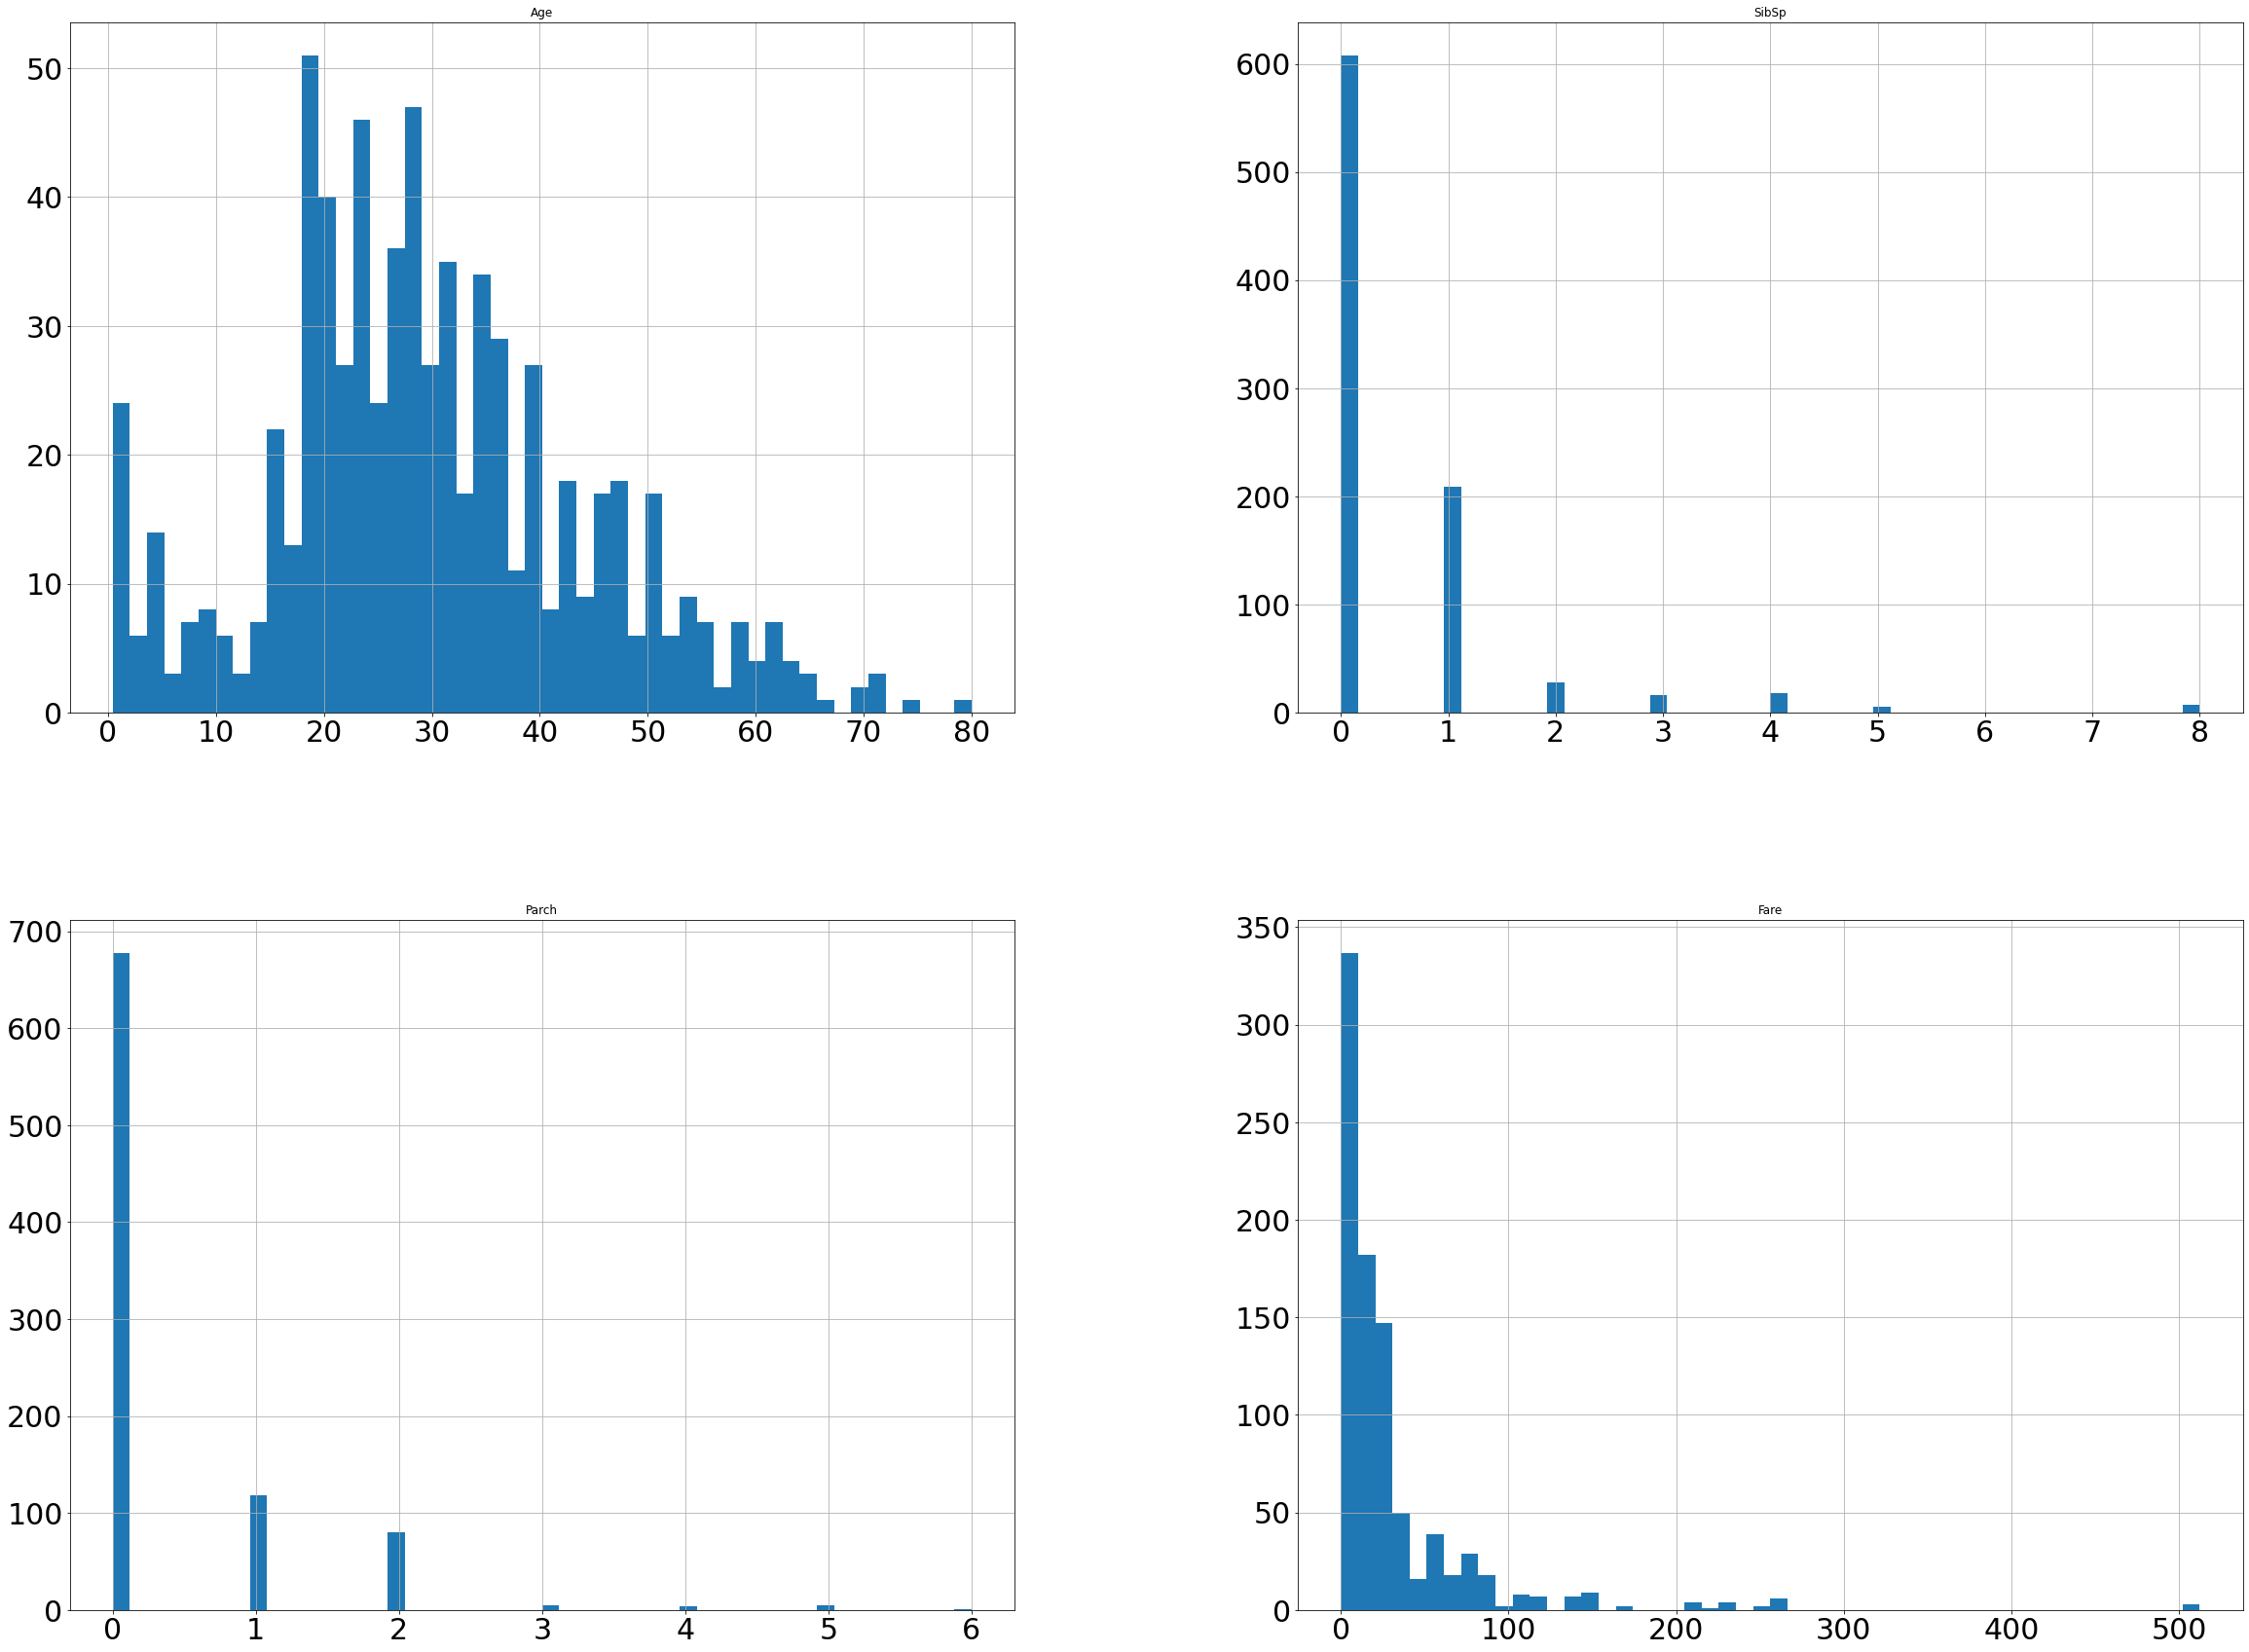

In [75]:
#show histogram of numerical data
df_train.hist(column = ['Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'], xlabelsize=30, ylabelsize=30, figsize = (40,30), bins=50)

<AxesSubplot:title={'center':'Survived'}>

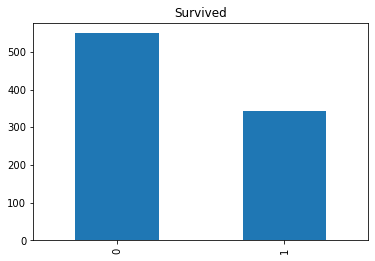

In [76]:
df_train["Survived"].value_counts().plot(kind='bar', title = "Survived")

<AxesSubplot:title={'center':'Pclass'}>

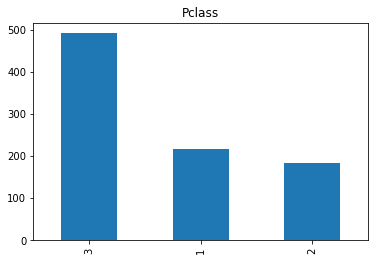

In [77]:
df_train["Pclass"].value_counts().plot(kind='bar', title = "Pclass")

<AxesSubplot:title={'center':'Sex'}>

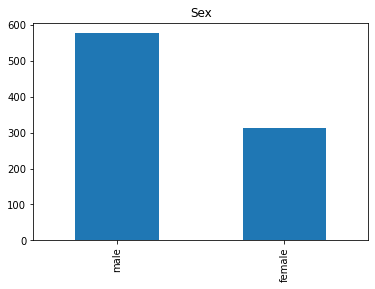

In [78]:
df_train["Sex"].value_counts().plot(kind='bar', title = "Sex")

<AxesSubplot:title={'center':'Embarked'}>

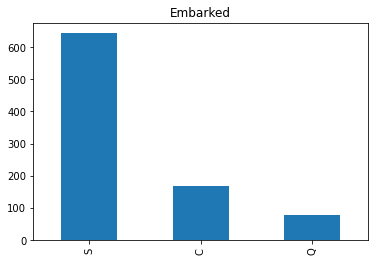

In [79]:
df_train["Embarked"].value_counts().plot(kind='bar', title = "Embarked")

## Data Preprocessing

### PassengerId
As the Id of a passenger is unique, it does not contain any usuful information for the analysis and it won't ne used a s an input to the model

In [80]:
#drop PassengerId column
df_train = df_train.drop(['PassengerId'], axis=1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Survived
The Survived column remains unchanged as it is binary data and it already has values of 0 and 1

In [81]:
# check if Pclass column contain None values
print(df_train["Survived"].isnull().values.any())

False


### Pclass
Pclass column contain 3 numerical categories, to avoid making 3rd class superior to 2nd and 1st class, one hot encoding will be applied

In [82]:
# check if Pclass column contain None values
print(df_train["Pclass"].isnull().values.any())

False


In [83]:
# get one hot encoding of columns Pclass
one_hot = pd.get_dummies(df_train['Pclass'], prefix="Class")
# drop column Pclass as it is now encoded
df_train = df_train.drop('Pclass',axis = 1)
# join the encoded df
df_train = df_train.join(one_hot)
df_train.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


### Name
Name won't be ised as an input to the model as it contains unique values for each passenger

In [84]:
#drop Name column
df_train = df_train.drop(['Name'], axis=1)
df_train.head()

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


### Sex
For Sex column data, binarization is applied

In [85]:
df_train.loc[df_train["Sex"] == 'male', "Sex"] = 0
df_train.loc[df_train["Sex"] == 'female', "Sex"] = 1
print(df_train["Sex"].value_counts())
df_train.head()

0    577
1    314
Name: Sex, dtype: int64


,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,0,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,1,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,1,1,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,0,0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


### Age
Age is numerical, float data, it should be unchanged. It will be only checked if there are no None values.

In [86]:
print(df_train["Age"].isnull().values.any())

True


In [87]:
# get number of NaN values in a column
print("# of Nan Values: ", df_train["Age"].isna().sum())
print("proportion of Nan values: ", 177/891)

# of Nan Values:  177
proportion of Nan values:  0.19865319865319866


Almost 20% of the Age data is equal to NaN. As it is a lot of data, it cannot be simply rejected. The NaN data will be substituted with random values from gaussian distribution of "Age" mean and std 

In [88]:
age_mean = df_train["Age"].mean()
print("Age mean: ", age_mean)
age_std = df_train["Age"].std()
print("Age std: ", age_std)

Age mean:  29.69911764705882
Age std:  14.526497332334044


In [89]:
#get mask of NaNs
a = df_train["Age"].isnull()
#get random values by sum ot Trues, processes like 1
norm_dist = np.random.normal(age_mean, age_std, a.sum())
#assign values by mask
df_train.loc[a, "Age"] = norm_dist
#check if there are no NaN values
print(df_train["Age"].isnull().values.any())

False


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

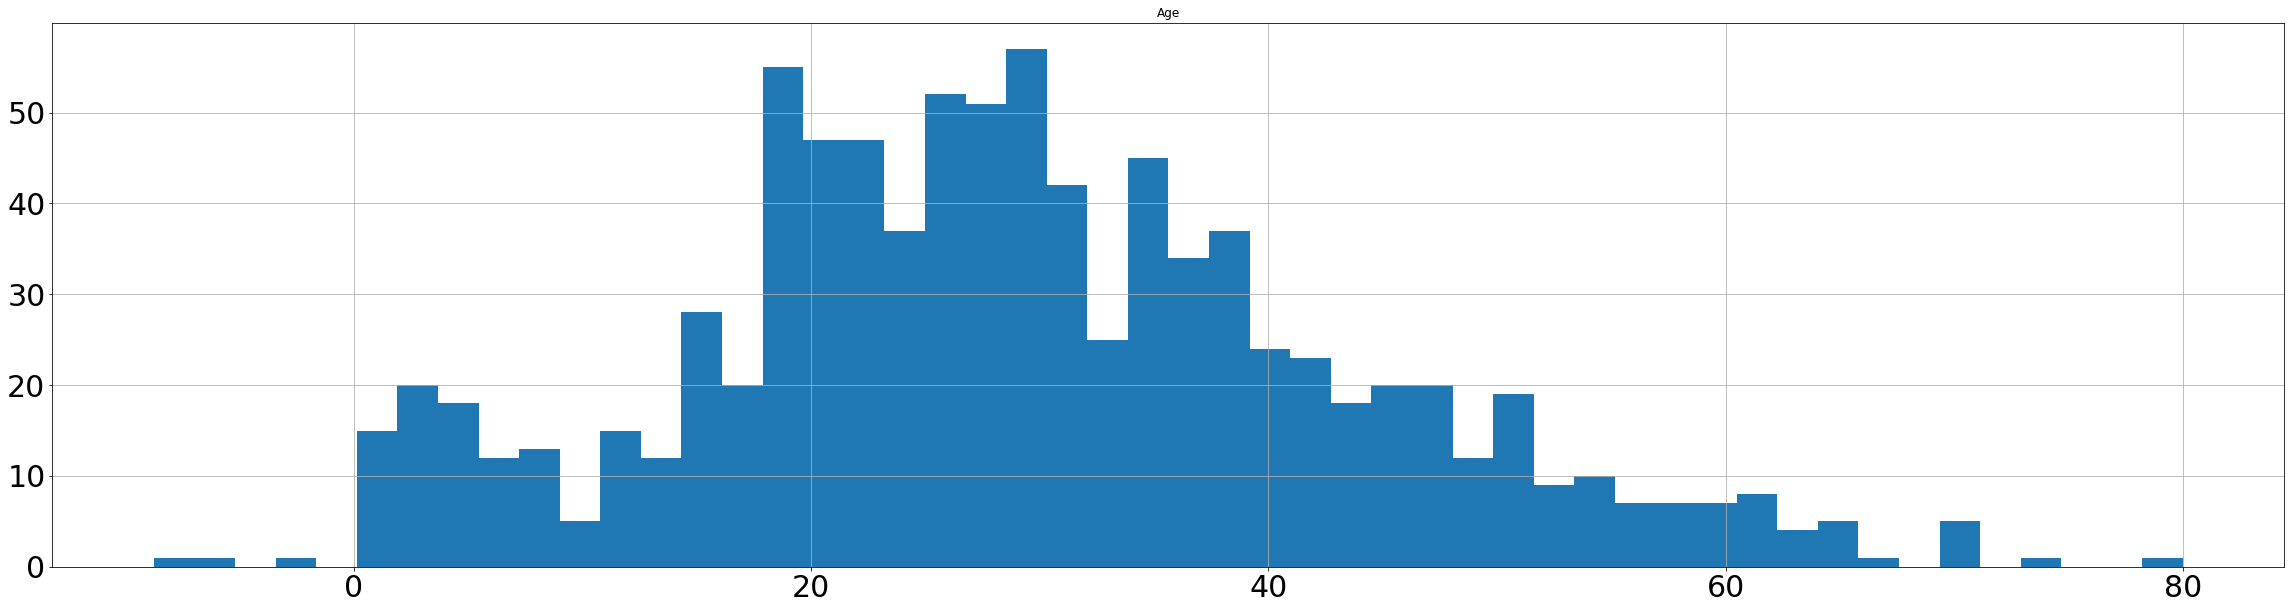

In [90]:
#show age distribution
df_train.hist(column = ['Age'], xlabelsize=30, ylabelsize=30, figsize = (40,10), bins=50)

### SibSp
SibSp is a numerical, int data. It should remained unchanged. It will be only checked if there are no NaN values

In [91]:
print(df_train["SibSp"].isnull().values.any())

False


### Parch
Parch is a numerical, int data. It should remained unchanged. It will be only checked if there are no NaN values

In [92]:
print(df_train["Parch"].isnull().values.any())

False


### Ticket
Ticket data at first glance seems to have too many diffrent categorical values to be used as an input to the model. What can be done is to check if a sertain ticket contain a specific part like "CA" or "PC" word but it was decided to simply drop column and investigate the problem in case of low final accuracy of the model

First, it will be checked if Ticket column contains any NaN values

In [93]:
print(df_train["Ticket"].isnull().values.any())

False


In [94]:
print(df_train[["Ticket", "Class_1", "Class_2", "Class_3"]].to_string())

                 Ticket  Class_1  Class_2  Class_3
0             A/5 21171        0        0        1
1              PC 17599        1        0        0
2      STON/O2. 3101282        0        0        1
3                113803        1        0        0
4                373450        0        0        1
5                330877        0        0        1
6                 17463        1        0        0
7                349909        0        0        1
8                347742        0        0        1
9                237736        0        1        0
10              PP 9549        0        0        1
11               113783        1        0        0
12            A/5. 2151        0        0        1
13               347082        0        0        1
14               350406        0        0        1
15               248706        0        1        0
16               382652        0        0        1
17               244373        0        1        0
18               345763        

In [95]:
#drop Ticket column
df_train = df_train.drop(['Ticket'], axis=1)
df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,0,0,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,1,38.0,1,0,71.2833,C85,C,1,0,0
2,1,1,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,1,35.0,1,0,53.1000,C123,S,1,0,0
4,0,0,35.0,0,0,8.0500,NaN,S,0,0,1


### Fare
Fare is a float data, should remain unchanged

In [96]:
# check if Fare column contains NaN values
print(df_train["Fare"].isnull().values.any())

False


### Cabin
To extract relevant information from Cabin column, the values can be splited to separate letters and numerical ending. However, let's first check for NaN values

In [97]:
# check if Cabin column contains NaN values
print(df_train["Cabin"].isnull().values.any())

True


In [98]:
#get number of NaN values in a column
print("# of Nan Values: ", df_train["Cabin"].isna().sum())

# of Nan Values:  687


In [99]:
#print not NaN values
print(df_train.loc[df_train["Cabin"].notnull(), "Cabin"].to_string())

1                  C85
3                 C123
6                  E46
10                  G6
11                C103
21                 D56
23                  A6
27         C23 C25 C27
31                 B78
52                 D33
54                 B30
55                 C52
61                 B28
62                 C83
66                 F33
75               F G73
88         C23 C25 C27
92                 E31
96                  A5
97             D10 D12
102                D26
110               C110
118            B58 B60
123               E101
124                D26
128              F E69
136                D47
137               C123
139                B86
148                 F2
151                 C2
166                E33
170                B19
174                 A7
177                C49
183                 F4
185                A32
193                 F2
194                 B4
195                B80
205                 G6
209                A31
215                D36
218        

There are too many empty values in the column. Moreover, the cabin number is correlated with the passenger's class as cabins of same class were located in the same area. Thus, it was decided to not to use the column

In [100]:
#drop Cabin column
df_train = df_train.drop(['Cabin'], axis=1)
df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Class_1,Class_2,Class_3
0,0,0,22.0,1,0,7.2500,S,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,0,0
2,1,1,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,1,0,0
4,0,0,35.0,0,0,8.0500,S,0,0,1


### Embarked
For the Embarked column, one hot encoding will be applied

In [101]:
# check if Fare column contains NaN values
print(df_train["Embarked"].isnull().values.any())

True


In [102]:
#get number of NaN values in a column
print("# of Nan Values: ", df_train["Embarked"].isna().sum())

# of Nan Values:  2


In [103]:
#delete rows with NaN values
df_train = df_train[df_train['Embarked'].notna()]
#get number of NaN values in a column
print("# of Nan Values: ", df_train["Embarked"].isna().sum())

# of Nan Values:  0


In [104]:
# get one hot encoding of columns Pclass
one_hot = pd.get_dummies(df_train['Embarked'], prefix="Embarked")
# drop column Pclass as it is now encoded
df_train = df_train.drop('Embarked',axis = 1)
# join the encoded df
df_train = df_train.join(one_hot)
df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


## Modelling

In [105]:
Y = df_train["Survived"]
df_train = df_train.drop(['Survived'], axis=1)
X = df_train

<class 'pandas.core.frame.DataFrame'>


## Decision Trees

In [106]:
from sklearn import tree
from sklearn.model_selection import KFold

In [110]:
kf = KFold(n_splits = 5, shuffle = True)
train_acc = []
test_acc = []
max_depth = range(2,21)
for n in max_depth:
    clf = tree.DecisionTreeClassifier(max_depth = n)
    test_scores = []
    train_scores = []
    for i in range(5):
        result = next(kf.split(X), None)
        x_train =X.iloc[result[0]]
        x_test = X.iloc[result[1]]
        y_train = Y.iloc[result[0]]
        y_test = Y.iloc[result[1]]
        model = clf.fit(x_train,y_train)
        predictions = clf.predict(x_test)
        test_scores.append(model.score(x_test,y_test))
        train_scores.append(model.score(x_train,y_train))
    print('Average test K-Fold Score:' , np.mean(test_scores))
    train_acc.append(np.mean(train_scores))
    test_acc.append(np.mean(test_scores))

Average test K-Fold Score: 0.7921348314606742
Average test K-Fold Score: 0.7719101123595505
Average test K-Fold Score: 0.7887640449438201
Average test K-Fold Score: 0.7999999999999999
Average test K-Fold Score: 0.7808988764044944
Average test K-Fold Score: 0.8067415730337079
Average test K-Fold Score: 0.7898876404494383
Average test K-Fold Score: 0.7921348314606742
Average test K-Fold Score: 0.749438202247191
Average test K-Fold Score: 0.7797752808988764
Average test K-Fold Score: 0.7898876404494383
Average test K-Fold Score: 0.7719101123595504
Average test K-Fold Score: 0.7707865168539325
Average test K-Fold Score: 0.7561797752808989
Average test K-Fold Score: 0.7752808988764046
Average test K-Fold Score: 0.749438202247191
Average test K-Fold Score: 0.7662921348314609
Average test K-Fold Score: 0.7292134831460675
Average test K-Fold Score: 0.7494382022471912


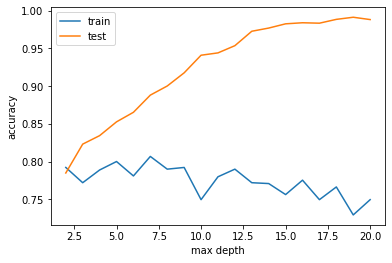

In [114]:
import matplotlib.pyplot as plt
plt.plot(max_depth, train_acc, label = "train")
plt.plot(max_depth, test_acc, label = "test")
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

## SVM

In [116]:
from sklearn import svm

In [119]:
train_acc = []
test_acc = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    test_scores = []
    train_scores = []
    for i in range(5):
        result = next(kf.split(X), None)
        x_train = X.iloc[result[0]]
        x_test = X.iloc[result[1]]
        y_train = Y.iloc[result[0]]
        y_test = Y.iloc[result[1]]
        model = clf.fit(x_train,y_train)
        predictions = clf.predict(x_test)
        test_scores.append(model.score(x_test,y_test))
        train_scores.append(model.score(x_train,y_train))
    print('Average test K-Fold Score:' , np.mean(test_scores))
    train_acc.append(np.mean(train_scores))
    test_acc.append(np.mean(test_scores))

Average test K-Fold Score: 0.7955056179775282
Average test K-Fold Score: 0.6123595505617978
Average test K-Fold Score: 0.6943820224719102
Average test K-Fold Score: 0.5842696629213483


In [121]:
print(train_acc[0])
print(test_acc[0])

0.7955056179775282
0.7850914205344586


## Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
clf = clf = LogisticRegression(solver='lbfgs', max_iter=1000)
train_scores = []
for i in range(5):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = Y.iloc[result[0]]
    y_test = Y.iloc[result[1]]
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    test_scores.append(model.score(x_test,y_test))
    train_scores.append(model.score(x_train,y_train))
print('Average test K-Fold Score:' , np.mean(test_scores))
print('Average train K-Fold Score:' , np.mean(train_scores))
train_acc = np.mean(train_scores)
test_acc = np.mean(test_scores)

Average test K-Fold Score: 0.7622792937399681
Average train K-Fold Score: 0.8118143459915611


## Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
train_scores = []
for i in range(5):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = Y.iloc[result[0]]
    y_test = Y.iloc[result[1]]
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    test_scores.append(model.score(x_test,y_test))
    train_scores.append(model.score(x_train,y_train))
print('Average test K-Fold Score:' , np.mean(test_scores))
print('Average train K-Fold Score:' , np.mean(train_scores))
train_acc = np.mean(train_scores)
test_acc = np.mean(test_scores)

Average test K-Fold Score: 0.7510112359550561
Average train K-Fold Score: 0.7853727144866385


## Neural Networks

In [313]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [314]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [315]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.tan = torch.nn.Tanh()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, output_size)
        self.sig = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.tan(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        output = self.sig(x)
        return output

In [316]:
input_size = 11
hidden_size = 5
output_size = 1
batch_size = 32

model = Net(input_size, hidden_size, output_size).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [317]:
X = X.astype(float)
Y = Y.astype(float)

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.2)

In [319]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float().view(-1, 1)
y_test = torch.from_numpy(y_test).float().view(-1, 1)

In [324]:
from sklearn.metrics import accuracy_score

# setting hyperparameters and gettings epoch sizes
num_epochs = 1500
num_samples_train = X_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = X_test.shape[0]
num_batches_valid = num_samples_valid // batch_size

# setting up lists for handling loss/accuracy
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
losses = []

get_slice = lambda i, size: range(i * size, (i + 1) * size)

for epoch in range(num_epochs):
    # Forward -> Backprob -> Update params
    ## Train
    cur_loss = 0
    model.train()
    for i in range(num_batches_train):
        optimizer.zero_grad()
        slce = get_slice(i, batch_size)
        output = model(X_train[slce])
        #print(output)
        # compute gradients given loss
        target_batch = y_train[slce]
        batch_loss = criterion(output, target_batch)
        batch_loss.backward()
        optimizer.step()
        
        cur_loss += batch_loss   
    losses.append(cur_loss / batch_size)

    model.eval()
    ### Evaluate training
    train_preds, train_targs = [], []
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        preds = model(X_train[slce]).detach().numpy()
        y_train_arg=y_train[slce].detach().numpy()
        train_targs += list(y_train_arg.astype(np.float32))
        train_preds += list(preds.astype(np.float32))
    
    ### Evaluate validation
    val_preds, val_targs = [], []
    for i in range(num_batches_valid):
        slce = get_slice(i, batch_size)
        
        preds = model(X_test[slce]).detach().numpy()
        y_test_arg=y_test[slce].detach().numpy()
        val_targs += list(y_test_arg.astype(np.float32))
        val_preds += list(preds.astype(np.float32))
    
    print(train_targs)
    print(train_preds)
    train_acc_cur = accuracy_score(train_targs, train_preds)
    valid_acc_cur = accuracy_score(val_targs, val_preds)
    
    train_acc.append(train_acc_cur)
    valid_acc.append(valid_acc_cur)
    
    if epoch % 10 == 0:
        print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                epoch+1, losses[-1], train_acc_cur, valid_acc_cur))

epoch = np.arange(len(train_acc))
plt.figure()
plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
plt.legend(['Train Accucary','Validation Accuracy'])
plt.xlabel('Updates'), plt.ylabel('Acc')

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

## Evaluation